In [2]:
##How to perform active machine learning

#Normal libraries

from pandas import read_csv
import pandas as pd
import numpy as np
import datetime

#Library to build a model using keras that is build on tensorflow
#(a library on how to handle tensor and their function)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

#Library to build generic models

from scipy.optimize import curve_fit


#Libraries about the learning process of the actual AI
from keras.callbacks import ModelCheckpoint
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

#Useful libraries
from matplotlib import pyplot as plt
import math

2023-07-04 12:42:16.107956: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-04 12:42:16.407345: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-04 12:42:16.409303: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-04 12:42:17.549337: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
Sensors = read_csv("../challenge_3/appa1_timeline.csv",
                     sep = ",")
Sensors.set_index("channel", inplace = True)
Sensors = Sensors.applymap(lambda x: x.replace("*", ""))

dfSC = read_csv("./StChiara_hourly.csv",
             sep = ",",
             parse_dates = ["ts"])
dfSC.set_index("ts", inplace = True)

change = {}
for i in range(1,9):
    change["S" +str(i)+"_R1"] = "T" + str(i)
    change["S" +str(i)+"_R2"] = "R" + str(i)
    change["S"+ str(i)+"_Voltage"] = "V"+str(i)
dfSC = dfSC.rename(columns=change)

In [4]:
Test = {}
maxim = len(Sensors.columns)
for i,col in enumerate(Sensors.columns):
    materials = []
    if i == maxim-1:
        for j,material in enumerate(Sensors[col]):
            f = materials.count(material)+1            
            materials.append(material)
            if list(Test.keys()).count(material + str(f)) == 1:
                Test[material + str(f)] = pd.concat([Test[material + str(f)],
                                                     dfSC[col:][["R"+str(j+1),
                                                                   "T"+str(j+1),
                                                                   "V"+str(j+1)]].rename(columns = {
                                                         "R"+str(j+1):"R",
                                                         "T"+str(j+1):"HT",
                                                         "V"+str(j+1):"V"
                                                     })])
            else:
                Test[material + str(f)] = dfSC[col:][["R"+str(j+1),
                                                                   "T"+str(j+1),
                                                                   "V"+str(j+1)]].rename(columns = {
                                                         "R"+str(j+1):"R",
                                                         "T"+str(j+1):"HT",
                                                         "V"+str(j+1):"V"
                                                     })    
    else:
        for j,material in enumerate(Sensors[col]):
            f = materials.count(material)+1            
            materials.append(material)
            if list(Test.keys()).count(material + str(f)) == 1:
                Test[material + str(f)] = pd.concat([Test[material + str(f)],
                                                     dfSC[col:Sensors.columns[i+1]][["R"+str(j+1),
                                                                   "T"+str(j+1),
                                                                   "V"+str(j+1)]].rename(columns = {
                                                         "R"+str(j+1):"R",
                                                         "T"+str(j+1):"HT",
                                                         "V"+str(j+1):"V"
                                                     })
                                                    ])
            else:
                Test[material + str(f)] = dfSC[col:Sensors.columns[i+1]][["R"+str(j+1),
                                                                   "T"+str(j+1),
                                                                   "V"+str(j+1)]].rename(columns = {
                                                         "R"+str(j+1):"R",
                                                         "T"+str(j+1):"HT",
                                                         "V"+str(j+1):"V"
                                                     })

In [5]:
dfSC = dfSC.apply(pd.to_numeric, errors='coerce')
dfSC = dfSC.dropna()

In [6]:
Test

{'ZnOR1':                                        R         HT         V
 ts                                                           
 2021-01-13 00:00:00+00:00            NaN        NaN       NaN
 2021-01-13 01:00:00+00:00            NaN        NaN       NaN
 2021-01-13 02:00:00+00:00            NaN        NaN       NaN
 2021-01-13 03:00:00+00:00            NaN        NaN       NaN
 2021-01-13 04:00:00+00:00            NaN        NaN       NaN
 ...                                  ...        ...       ...
 2023-06-26 05:00:00+00:00  161625.094828  68.558621  1.990172
 2023-06-26 06:00:00+00:00  162563.966667  68.520000  1.989667
 2023-06-26 07:00:00+00:00  166067.916667  68.536667  1.989500
 2023-06-26 08:00:00+00:00  171913.950000  68.570000  1.990000
 2023-06-26 09:00:00+00:00  173276.166667  68.616667  1.990000
 
 [21658 rows x 3 columns],
 'ZnOR2':                                        R         HT         V
 ts                                                           
 2021-01

In [7]:
dfAPPA = read_csv("/home/wvuser/challenge_3/APPA1.csv", parse_dates=["Time"])
dfAPPA = dfAPPA.rename(columns={"Time": "ts"})

In [8]:
dfAPPA.ts

0       2020-01-01 01:00:00
1       2020-01-01 02:00:00
2       2020-01-01 03:00:00
3       2020-01-01 04:00:00
4       2020-01-01 05:00:00
                ...        
33134   2022-03-04 14:00:00
33135   2022-06-21 14:00:00
33136   2022-09-02 11:00:00
33137   2023-02-01 13:00:00
33138   2023-04-26 14:00:00
Name: ts, Length: 33139, dtype: datetime64[ns]

In [9]:
timezone_offset = datetime.timedelta(hours=2)
timezone = datetime.timezone(timezone_offset)
dfAPPA.ts = dfAPPA.ts.apply(lambda x: x.replace(tzinfo=timezone))


# timezone_offset = datetime.timedelta(hours=0)
# timezone = datetime.timezone(timezone_offset)
# dfSC.ts = dfSC.ts.apply(lambda x: x.replace(tzinfo=timezone))

dfAPPA.rename(columns = {"Time":"ts"}, inplace = True)

In [10]:
df_tot = dfAPPA.merge(Test["ZnOR1"].reset_index())

In [11]:
df_tot

,ts,PM10,Biossido di Azoto,Biossido Zolfo,Ozono,PM2.5,R,HT,V
0,2021-01-13 02:00:00+02:00,49.0,68.0,3.0,4.0,30.0,NaN,NaN,NaN
1,2021-01-13 03:00:00+02:00,48.0,64.0,3.0,4.0,30.0,NaN,NaN,NaN
2,2021-01-13 04:00:00+02:00,44.0,64.0,3.0,4.0,29.0,NaN,NaN,NaN
3,2021-01-13 05:00:00+02:00,39.0,65.0,3.0,4.0,26.0,NaN,NaN,NaN
4,2021-01-13 06:00:00+02:00,35.0,67.0,3.0,3.0,23.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
24226,2022-03-04 14:00:00+02:00,NaN,NaN,NaN,75.0,41.0,4.613902e+08,118.216667,3.9800
24227,2022-06-21 14:00:00+02:00,NaN,NaN,NaN,143.0,NaN,4.990000e+08,127.730000,4.0635
24228,2022-09-02 11:00:00+02:00,NaN,NaN,NaN,61.0,NaN,4.990000e+08,131.246667,3.8940
24229,2023-02-01 13:00:00+02:00,NaN,NaN,NaN,32.0,NaN,NaN,NaN,NaN


In [12]:
df_tot = df_tot.set_index("ts")
df_tot = df_tot.sort_index()
df_tot = df_tot.dropna()

In [13]:
##Example of curve fit

##Define a model
def f_model(x, a, b, c, d, e):
    Sig,T,RH = x
    return a*Sig**b + d*T + e + c


##df8 is an example of a dataframe, indexed with data and with columns name not really informative

##### APPLICO MODEL 1 A df_tot (merge tra dfAPPA e Test) NEL PERIODO TRA 13-01-2021 E 13-02-2021
##### CONFRONTANDO UN SENRORE (R, V, HT) CON LA CONCENTRAZIONE DI OZONO NELL'ARIA
##You are training here from a start to end the slicing of a database
popt, pcov = curve_fit( #popt are the optimal values, pcov is the covariance matrix of the optimized values.
    f=f_model,       # model function
    xdata=(df_tot["2021-01-13":"2021-02-13"]["R"].values,
           df_tot["2021-01-13":"2021-02-13"]["V"].values,
           df_tot["2021-01-13":"2021-02-13"]["HT"].values),   # x data
    ydata=df_tot["2021-01-13":"2021-02-13"]["Ozono"].values,   # y data
    p0=(4, 1, 1, 1, 1), # initial value of the parameters
    maxfev=10000      #Number of times in which you repeat the training, close to epochs
)
a_opt,b_opt,c_opt,d_opt,e_opt = popt # optimal values
df_tot["model 1"] = f_model((df_tot["R"].values,
                         df_tot["V"].values,
                         df_tot["HT"].values), 
                        a_opt,
                        b_opt,
                        c_opt,
                        d_opt,
                        e_opt) #Here you are predicting the value of your complete samples

In [14]:
meanINVERNO2021 = df_tot["1/13/2021":"4/29/2021"].R.mean()
meanINVERNO2022 = df_tot["1/14/2022":"4/19/2022"].R.mean()

stdINVERNO2021 = df_tot["1/13/2021":"4/29/2021"].R.std()
stdINVERNO2022 = df_tot["1/14/2022":"4/19/2022"].R.std()

# sup = resistance of sensor 1 during winter
sup = (df_tot["1/13/2021":"4/29/2021"].R - meanINVERNO2021)/stdINVERNO2021
sup = stdINVERNO2022*sup+meanINVERNO2022

In [15]:
meanPRIM2021 = df_tot["4/29/2021":"6/30/2021"].R.mean()
meanPRIM2022 = df_tot["4/19/2022":"6/30/2022"].R.mean()

stdPRIM2021 = df_tot["4/29/2021":"6/30/2021"].R.std()
stdPRIM2022 = df_tot["4/19/2022":"6/30/2022"].R.std()

# sup2 = resistance of sensor 1 during spring
sup2 = (df_tot["4/29/2021":"6/30/2021"].R - meanPRIM2021)/stdPRIM2021
sup2 = stdPRIM2022*sup2 + meanPRIM2022

In [32]:
##### dfFINAL --> DOPO LA TRASFORMAZION DI STDEV
dfFINAL = df_tot[:"2/8/2023"].copy()
# #dfFINAL.R = pd.concat([sup,sup2,df_tot["6/30/2021":"2/8/2023"].R]).values
# dfFINAL["4/29/2021":"6/30/2021"].R.replace(value = sup.values, inplace = True)
# dfFINAL["1/14/2022":"4/19/2022"].R.replace(value  = sup2.values, inplace = True)
dfFINAL.loc["4/29/2021":"6/30/2021","R"] = sup2.loc["4/29/2021":"6/30/2021"].values
dfFINAL.loc["1/13/2021":"4/29/2021","R"] = sup.loc["1/13/2021":"4/29/2021"].values

In [40]:
##### APPLICO MODEL 2 A dfFINAL (df_tot DOPO LA TRASFORMAZION DI STDEV) NEL PERIODO TRA 13-03-2021 E 13-05-2021
##### CONFRONTANDO UN SENRORE (R, V, HT) CON LA CONCENTRAZIONE DI OZONO NELL'ARIA

popt, pcov = curve_fit( #popt are the optimal values, pcov is the covariance matrix of the optimized values.
    f=f_model,       # model function
    xdata=(dfFINAL["2021-03-13":"2021-05-13"]["R"].values,
           dfFINAL["2021-03-13":"2021-05-13"]["V"].values,
           dfFINAL["2021-03-13":"2021-05-13"]["HT"].values),   # x data
    ydata=dfFINAL["2021-03-13":"2021-05-13"]["Ozono"].values,   # y data
    p0=(4, 1, 1, 1, 1), # initial value of the parameters
    maxfev=10000      #Number of times in which you repeat the training, close to epochs
)
a_opt,b_opt,c_opt,d_opt,e_opt = popt # optimal values
dfFINAL["model 2"] = f_model((dfFINAL["R"].values,
                         dfFINAL["V"].values,
                         dfFINAL["HT"].values), 
                        a_opt,
                        b_opt,
                        c_opt,
                        d_opt,
                        e_opt) #Here you are predicting the value of your complete samples

<function matplotlib.pyplot.show(close=None, block=None)>

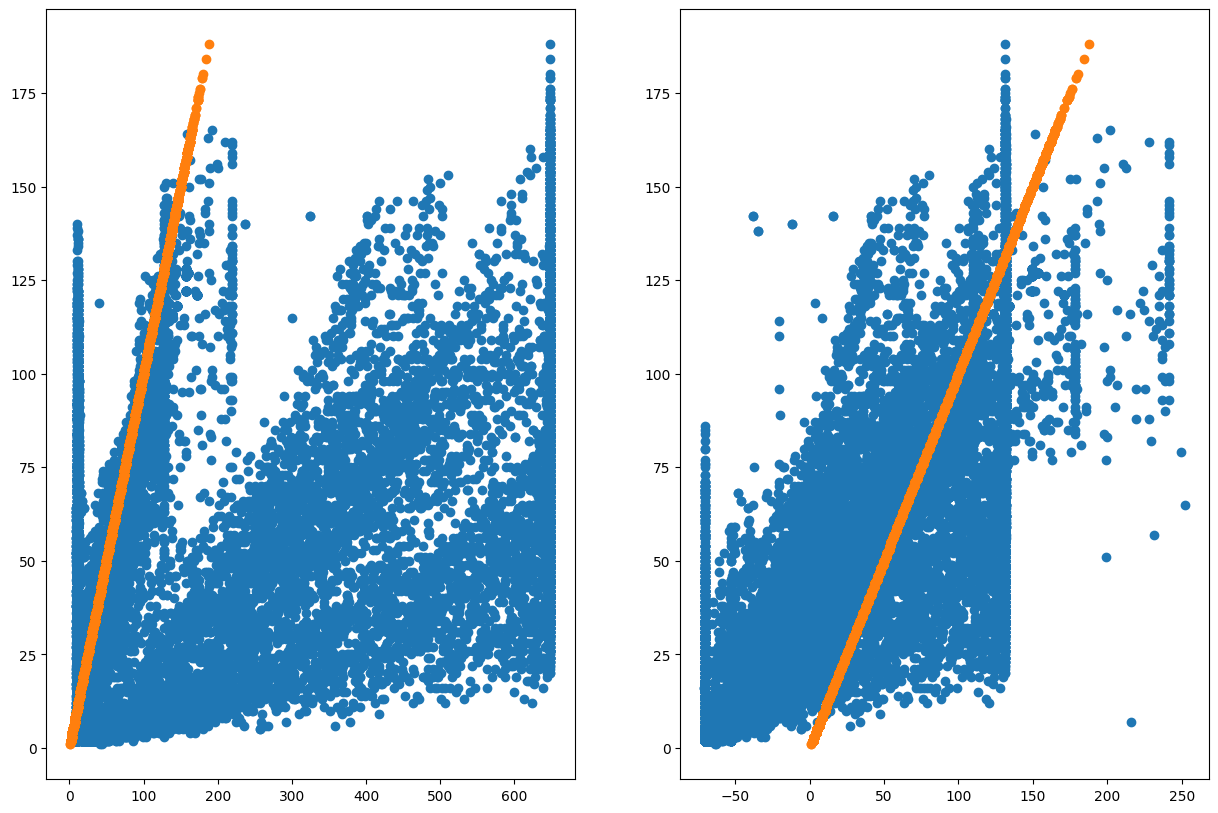

In [44]:
fig,(ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
ax1.scatter(
    df_tot['model 1'],
    df_tot["Ozono"]
)
ax2.scatter(
    dfFINAL['model 2'],
    dfFINAL["Ozono"]
)
ax1.scatter(
    dfFINAL["Ozono"],
    dfFINAL["Ozono"]
)
ax2.scatter(
    dfFINAL["Ozono"],
    dfFINAL["Ozono"]
)
plt.show

In [71]:
df_tot

,ts,PM10,Biossido di Azoto,Biossido Zolfo,Ozono,PM2.5,R,HT,V,model 1
0,2021-01-13 10:00:00+00:00,34.0,81.0,7.0,7.0,25.0,7.513813e+07,67.050000,1.431667,143.676119
1,2021-01-13 11:00:00+00:00,40.0,78.0,7.0,10.0,27.0,1.229693e+05,100.600000,3.954423,10.740253
2,2021-01-13 12:00:00+00:00,38.0,64.0,5.0,17.0,26.0,1.667689e+05,101.523333,3.996333,10.956545
3,2021-01-13 13:00:00+00:00,30.0,55.0,5.0,23.0,21.0,1.783548e+05,101.588333,3.995833,11.006798
4,2021-01-13 14:00:00+00:00,28.0,56.0,5.0,21.0,21.0,6.142983e+05,101.188333,3.957167,12.646133
...,...,...,...,...,...,...,...,...,...,...
20911,2023-06-26 07:00:00+00:00,24.0,22.0,2.0,61.0,12.0,1.616251e+05,68.558621,1.990172,10.012449
20912,2023-06-26 08:00:00+00:00,20.0,24.0,3.0,63.0,11.0,1.625640e+05,68.520000,1.989667,10.016354
20913,2023-06-26 09:00:00+00:00,20.0,16.0,3.0,86.0,11.0,1.660679e+05,68.536667,1.989500,10.031677
20914,2023-06-26 10:00:00+00:00,16.0,11.0,2.0,109.0,11.0,1.719140e+05,68.570000,1.990000,10.057474


In [72]:
dfSC

,level_0,index,ts,R1,R2,R3,R4,R5,R6,R7,...,V3,V4,V5,V6,V7,V8,T,RH,P,IAQ
0,0,0,2019-08-26 16:00:00+00:00,8.050480e+04,1.957000e+03,1.178759e+08,8.624352e+07,4.990000e+08,4.990000e+08,4.990000e+08,...,0.354000,0.354000,0.352000,0.350000,0.354000,0.350000,25.520000,62.040000,979.320000,122.400000
1,1,1,2019-08-27 07:00:00+00:00,7.720806e+04,1.971625e+03,1.195054e+08,8.806156e+07,4.990000e+08,4.990000e+08,4.990000e+08,...,0.353125,0.356250,0.351250,0.350625,0.355000,0.351250,27.525000,58.487500,979.162500,186.920000
2,2,2,2019-08-27 13:00:00+00:00,1.271295e+07,1.310720e+08,4.990000e+08,4.990000e+08,4.990000e+08,4.990000e+08,4.990000e+08,...,0.353421,0.357105,0.351842,0.354737,0.356053,0.363947,27.952632,52.492105,993.123684,490.684474
3,3,3,2019-08-27 14:00:00+00:00,3.639655e+07,1.310720e+08,4.990000e+08,4.990000e+08,4.990000e+08,4.990000e+08,4.990000e+08,...,0.354407,0.357797,0.354237,0.358305,0.357797,0.365763,28.374576,53.671186,992.783051,501.701017
4,4,4,2019-08-27 15:00:00+00:00,1.706043e+07,3.910342e+07,1.454772e+08,1.459225e+08,4.575161e+08,4.559255e+08,2.236950e+08,...,3.156610,3.174576,3.107966,3.122034,3.423220,3.212881,33.803390,42.447458,992.488136,483.360508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26072,26072,26072,2023-06-26 05:00:00+00:00,4.073563e+07,1.280000e+08,1.616251e+05,2.280766e+05,1.133645e+08,2.970317e+08,6.699525e+07,...,1.990172,2.067414,1.951034,4.068534,4.517500,2.243362,30.687931,32.784483,992.688793,245.402586
26073,26073,26073,2023-06-26 06:00:00+00:00,3.822222e+07,1.280000e+08,1.625640e+05,2.293559e+05,1.164913e+08,3.161260e+08,6.385535e+07,...,1.989667,2.064833,1.949833,4.068500,4.517833,2.243167,30.778333,32.996667,992.321667,237.058333
26074,26074,26074,2023-06-26 07:00:00+00:00,3.360000e+07,1.280000e+08,1.660679e+05,2.362660e+05,1.454595e+08,4.388616e+08,5.632304e+07,...,1.989500,2.067000,1.951167,4.069167,4.518833,2.242333,31.126667,32.938333,991.865000,216.921667
26075,26075,26075,2023-06-26 08:00:00+00:00,3.235556e+07,1.280000e+08,1.719140e+05,2.490089e+05,1.882623e+08,4.990000e+08,4.523518e+07,...,1.990000,2.066833,1.951667,4.069000,4.518333,2.242833,31.378333,32.275000,991.310000,164.333333


In [73]:
dfSC = dfSC.reset_index()
df_tot = df_tot.reset_index()

ValueError: cannot insert level_0, already exists

In [74]:
timezone_offset = datetime.timedelta(hours=0)
timezone = datetime.timezone(timezone_offset)
df_tot.ts = df_tot.ts.apply(lambda x: x.replace(tzinfo=timezone))

timezone_offset = datetime.timedelta(hours=0)
timezone = datetime.timezone(timezone_offset)
dfSC.ts = dfSC.ts.apply(lambda x: x.replace(tzinfo=timezone))

In [76]:
DFTOT = df_tot.merge(dfSC[["ts","T", "RH", "P", "IAQ"]])

In [100]:
try:
    DFTOT = DFTOT.set_index("ts")
except:
    pass
for i in DFTOT.columns:
    DFTOT[i] = pd.to_numeric(DFTOT[i],errors = "coerce" )
DFTOT = DFTOT.dropna()

In [101]:
##Example of Scaler, matrices or something like these

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

##Place whatever dataframe you want
X = DFTOT.drop(["PM10", "PM2.5", "Biossido di Azoto", "Biossido Zolfo", "Ozono"], axis=1)

y = DFTOT[["PM10", "PM2.5", "Biossido di Azoto", "Biossido Zolfo", "Ozono"]].copy()

INPUT_DIM = len(X.columns)
OUTPUT_DIM = len(y.columns)

In [102]:
#Split training and test, remember that you may want to not shuffle data while dividing them
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, shuffle = False)
#You perform a standard scaler (or minmax scaler) to make the data more usable by the machine learning
#model
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaler=StandardScaler()
scaler.fit(y_train)

y_train_s = scaler.transform(y_train)
y_test_s = pd.DataFrame(data = scaler.transform(y_test), columns = y_test.columns)

In [ ]:
# define the model
#Experiment with deeper and wider networks
model = Sequential()
#By Sequential it means that the layers are connected one after the one before so that you have a defined flow of information

# Input layer, Dense layer meaning that the layer is connected to all the neurons to the layer before
# kernel_initializer is the how the starting values of the parameters of your neural network (NN)
#input_dim is the number of features of the dataset that you are feeding to your NN
#activation function is how you introduce non linearity in your model.

model.add(Dense(64, kernel_initializer='normal',input_dim=INPUT_DIM, activation='selu'))

#Hidden layers:
#Dropout layer is just a layer where you drops, for example the 20% of the links between the two layers
#that it is placed between
model.add(Dropout(0.2))

model.add(Dense(128, kernel_initializer='normal',activation='selu'))
model.add(Dropout(0.2))
model.add(Dense(64, kernel_initializer='normal',activation='selu'))
model.add(Dropout(0.2))

model.add(Dense(16, kernel_initializer='normal',activation='selu'))
model.add(Dropout(0.2))

#Output layer
model.add(Dense(OUTPUT_DIM, kernel_initializer='normal',activation='linear'))

#with add you can add a new layer, with pop you remove the last layer you have placed there


#You are compiling your model, so from now on you can't change its structure. Here you specify its loss function,
#the function that you want to minimize, the optimizer that is how you want to optimize the parameters,
#the metrics that is another value that you can use to measure your model but you won't use it to optimize
#the model
model.compile(loss=a2, optimizer='adam', metrics=[a2])
#You are showing how your NN is formed
model.summary()

##Here you are defining something that is not necessary. You are defining condition by which you are saving
#definite models. For example in that case you are specifing where do you want to place them, you are searching
#the model where the value of the loss function over the validation set (data not seen by the model during
#the training) is minimum. The weight of the "best model" by that value is saved there.
checkpoint_name = './tmp/checkpoint' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='min')
callbacks_list = [checkpoint]
#In the history you collect the important information that happens during the fit, value of loss function,
#metrics and so on in one variable.
#During the fit  the parameters of the NN are updated. You are specifing the training data, X and y, and either
#you give the fit function the validation data or you give them a percentage as the validation_split, in this case 20%
#after that you are specifing the number of epochs, meaning how many time the model has seen the same data,
#and then the callbacks that you want to use. Notice that you can have more than one callback.
#There are more parameters that you can implement, so take a look at them
history = model.fit(X_train_scaled, y_train_s, validation_split=0.2, epochs=300,callbacks=[checkpoint])
#After performing the training you are uploading the best model that you have saved in the callback, updating
#the value of your parameters
model.load_weights(checkpoint_name)

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['mean_squared_error']
val_acc = history.history['val_mean_squared_error']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

############################################
#Predict on test data
predictions = model.predict(X_test_scaled)

predictions = scaler.inverse_transform(predictions)

y_test_ssaved = y_test_s
y_test_s = y_test
print("Predicted values are: ", predictions)
print("Real values are: ", y_test_s)

##############################################
#Plot and compare prediction and real value
t = np.arange(0, predictions.size, 1)
plt.scatter(predictions, y_test_s, label='Prediction')
plt.scatter(y_test_s, y_test_s, label='Real Value')
plt.title('Prediction')
plt.xlabel('Prediction')
plt.ylabel('Real Value')
plt.legend()
plt.show()


In [ ]:
##Example of RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

from sklearn.metrics import r2_score


In [ ]:
##Same thing you have done before, define an X and y from a dataset if you want to try.

xtrain, xtest, ytrain, ytest=train_test_split(X, Y, shuffle = True, test_size=0.20)
scaler=MinMaxScaler()
scaler2 = MinMaxScaler()
scaler.fit(xtrain)

X_train = scaler.transform(xtrain)
X_test = scaler.transform(xtest)
scaler2.fit(ytrain.values.reshape(-1, 1))

y_train = scaler2.transform(ytrain.values.reshape(-1, 1))
y_test = scaler2.transform(ytest.values.reshape(-1, 1))

In [ ]:
rfr = RandomForestRegressor()

 
#Here are some hyperparameter of your regressor, it's a bit better and easier to look up at what the difference
#parameter does. All of this hyperparameter can be optimized using the validation data.
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features=3, max_leaf_nodes=None,
                      max_samples=0.1, min_impurity_decrease=0.0,
                      min_samples_leaf=0.01,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) 

In [ ]:
#fit of the RandomForestRegressor

rfr.fit(X_train, y_train.reshape(-1, 1))
#evaluation of its performance by the R-squared

score = rfr.score(X_train, y_train.reshape(-1, 1))
print("R-squared:", score) 

ypred = rfr.predict(X_test)
#evaluation of its performance by the mean_squared_error

mse = mean_squared_error(y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 